In [323]:
from __future__ import division
import os
import sys
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
%precision 4
#plt.style.use('ggplot')
import seaborn as sns
sns.set_style('white')
sns.set_context('paper')

In [324]:
import networkx as nx
from collections import Counter
import community

In [325]:
# # import data
df_raw_data = pd.read_excel('./data/brand pairs.xlsx')
print(df_raw_data.shape)
print(df_raw_data.head())

(8528, 5)
  Source Target  Start      ID        Type
0     长安     奔腾   2010  478 01  Undirected
1     长安     一汽   2010  478 02  Undirected
2     长安   MINI   2010  478 03  Undirected
3     奔腾     一汽   2010  478 12  Undirected
4     奔腾   MINI   2010  478 13  Undirected


In [326]:
# # create empty undirected graph
G = nx.Graph()

# add edges
G.add_edges_from(df_raw_data[['Source', 'Target']].values.tolist())

In [327]:
pd.DataFrame(nx.eigenvector_centrality_numpy(G), index=[0]).T.reset_index().sort_values(0, ascending=False).head()

,index,0
10,大众,0.203443
9,宝马,0.198800
8,丰田,0.198127
13,特斯拉,0.195834
31,奥迪,0.184746


In [328]:
# determine the verticies' size as multipled by 1000
node_size = [10 * i[1] for i in G.degree]

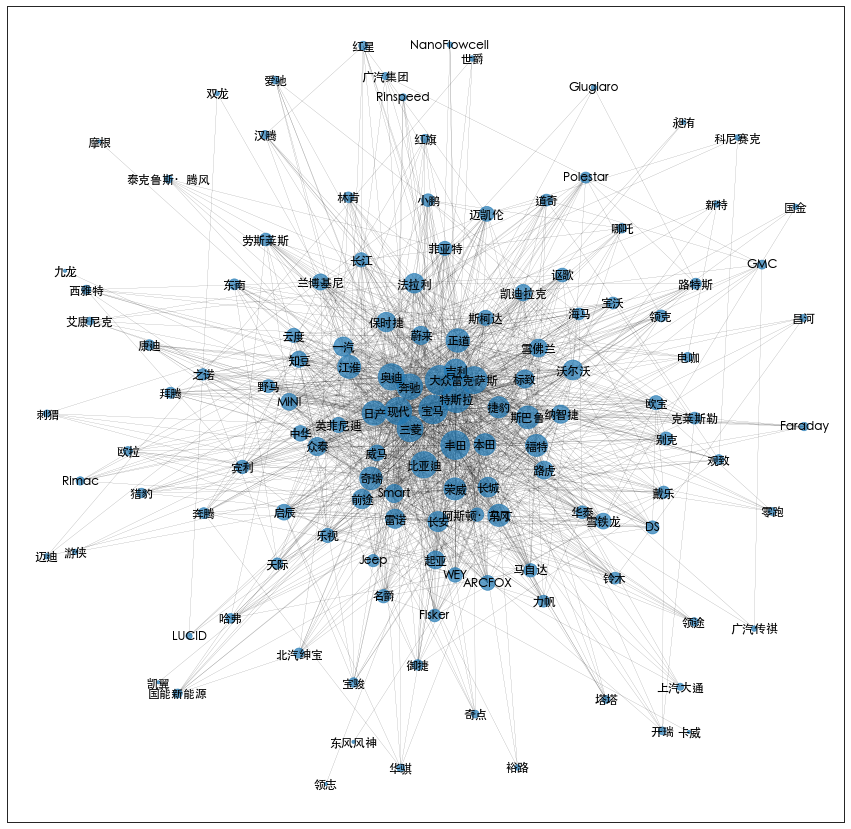

In [329]:
# draw
plt.figure(figsize=(15, 15))

pos = nx.spring_layout(G, k=1, seed=1)
nx.draw_networkx_nodes(G, pos, alpha=0.7, node_size=node_size)
nx.draw_networkx_labels(G, pos, font_family="Heiti TC")
nx.draw_networkx_edges(G, pos, edge_cmap=plt.cm.Greys, width=0.1)

# plt.savefig("./data/default.png")
plt.show()

In [330]:
# degree
pd.DataFrame(G.degree).sort_values(1, ascending=False).head()

,0,1
10,大众,86
13,特斯拉,82
8,丰田,82
9,宝马,82
23,现代,73


In [331]:
# page rank
pd.DataFrame(nx.pagerank(G), index=[0]).T.reset_index().sort_values(0, ascending=False).head()

,index,0
10,大众,0.026125
13,特斯拉,0.026005
8,丰田,0.025922
9,宝马,0.024996
23,现代,0.023186


In [332]:
# betweenness centrality
pd.DataFrame(nx.betweenness_centrality(G), index=[0]).T.reset_index().sort_values(0, ascending=False).head()

,index,0
13,特斯拉,0.078695
8,丰田,0.077970
10,大众,0.075209
23,现代,0.066032
9,宝马,0.063150


In [333]:
# closeness centrality
pd.DataFrame(nx.closeness_centrality(G), index=[0]).T.reset_index().sort_values(0, ascending=False).head()

,index,0
10,大众,0.736264
8,丰田,0.720430
9,宝马,0.716578
13,特斯拉,0.716578
23,现代,0.687179


In [334]:
# clustering coefficiency
print(nx.average_clustering(G))
pd.DataFrame(nx.clustering(G), index=[0]).T.reset_index().sort_values(0, ascending=False).head()

0.6296001521320461


,index,0
46,Rinspeed,1.0
130,昶洧,1.0
79,昌河,1.0
94,NanoFlowcell,1.0
80,游侠,1.0


In [352]:
# louvain algorithm clustering
partition=community.best_partition(G, random_state=0)
# # of clustering
print(pd.DataFrame(partition, index=[0]).T[0].value_counts())

3    46
1    33
2    28
0    28
Name: 0, dtype: int64


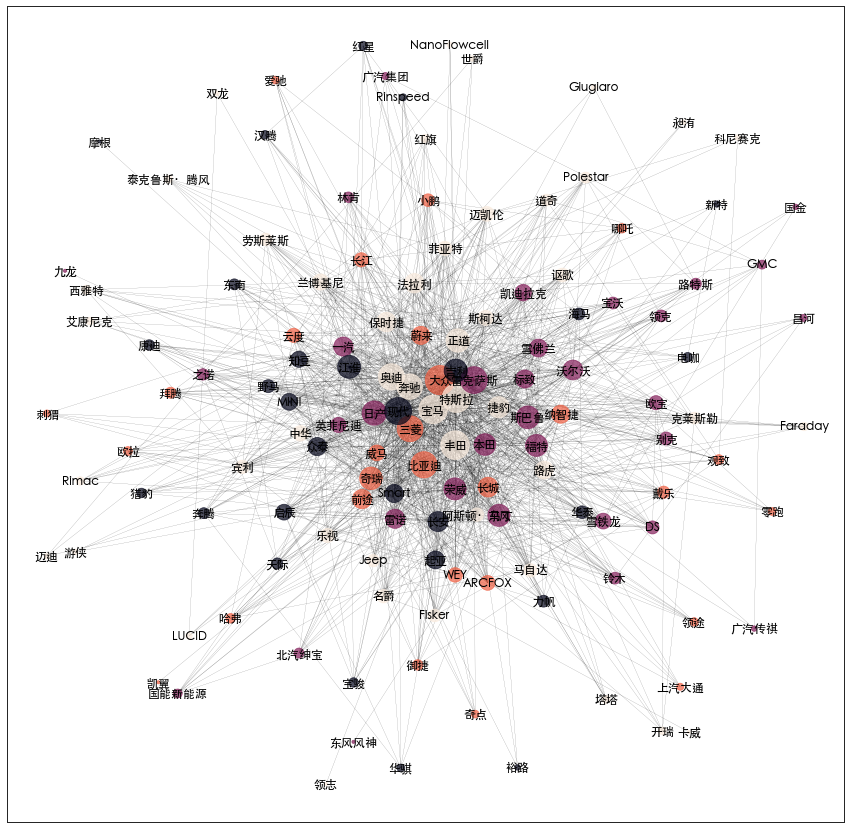

In [353]:
# determine the verticies' size as multipled by 1000
node_size = [10 * i[1] for i in G.degree]

# draw 
plt.figure(figsize=(15, 15))

pos = nx.spring_layout(G, k=1, seed=1)
nx.draw_networkx_nodes(G, pos, alpha=0.7, node_size=node_size, node_color=list(partition.values()))
nx.draw_networkx_labels(G, pos, font_family="Heiti TC")
nx.draw_networkx_edges(G, pos, edge_cmap=plt.cm.Greys, width=0.1)


plt.show()

In [354]:
# add english name for better understanding
english_name=['Changan','Pentium','FAW','MINI','Dongfeng','Nissan','Yangtze','Mitsubishi','Toyota','BMW','public','Chevrolet','Opel','Tesla','Peugeot','Zotye','BYD','Chery','Lexus','Subaru','Jaguar','Cadillac','Porsche','modern','Kia','China','Honda','future','Ford','Great Wall','Haval','Audi','Mercedes','Smart','Ferrari','Renault','auspicious','Volvo','Chrysler','Fiat','Dai Le','Land Rover','right way','Dodge','GMC','Rolls Royce','Rinspeed','Infiniti','Citroen','Euler','Roewe','DS','Buick','Kai Chen','Acura','Fisker','Lotus','JAC','Lamborghini','Mazda','Bentley','Rimac','SUZUKI','Lincoln','mg','red flag','Aston Martin','Lifan','Na Zhijie','Skoda','Sky','BAIC Shenbao','National Energy New Energy','Mustang','Baojun','Zino','Hua Qi','Kandy','Seat','Changhe','Ranger','Zhidou','Yu Jie','Jeep','Guanzhi','Ssangyong','Singular point','McLaren','SAIC Maxus','Letv','Tata','Carry','southeast','Kowloon','NanoFlowcell','Leading','Seahorse','Koenigsegg','Maidi','Knight','Huatai','Faraday','LUCID','WEY','National Gold','Red Star','ARCFOX','Cheetah','Wei Lai','Kawei','Kaiyi','Tyrus Cruise','Xiaopeng','Cloudiness','Polestar','Weimar','GAC Trumpchi','Bowo','Econic','Guangzhou Automobile Group','Han Teng','Yulu','Electric coffee','Byton','Collar','Morgan','Aichi','Giugiaro','Xinte','Hedgehog','Chang','Nezha','Zero run','Lead','Dongfeng Fengshen']
w_english = pd.concat([pd.DataFrame(partition, index=[0]).T.reset_index(), pd.Series(english_name, name='english')], axis=1).rename(columns={'index':'mandarin', 0:'cluster'})

In [358]:
# brands for each cluster
for i in range(4):
    print(w_english[w_english['cluster'] == i].head())

   mandarin  cluster  english
0        长安        0  Changan
1        奔腾        0  Pentium
3      MINI        0     MINI
15       众泰        0    Zotye
23       现代        0   modern
   mandarin  cluster    english
2        一汽        1        FAW
4        东风        1   Dongfeng
5        日产        1     Nissan
11      雪佛兰        1  Chevrolet
12       欧宝        1       Opel
   mandarin  cluster     english
6        长江        2     Yangtze
7        三菱        2  Mitsubishi
10       大众        2      public
16      比亚迪        2         BYD
17       奇瑞        2       Chery
   mandarin  cluster  english
8        丰田        3   Toyota
9        宝马        3      BMW
13      特斯拉        3    Tesla
20       捷豹        3   Jaguar
22      保时捷        3  Porsche


cluster 0 is most low end maybe budget  
cluster 1 is most common brands  
cluster 2 feel like not famous or new brands  
cluster 3 seems most high end